# pyArgus 
## Demonstation and documentation for the radiation pattern plot

License: GPLv3

Version: 1.0

Author: Tamás Pető

In [2]:
from pyargus.antennaArrayPattern import array_rad_pattern_plot
from pyargus.tests.patternPlotTest import demo_ULA_plot, demo_UCA_plot

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The array factor of an $N$ element antenna array can be calculated usign the following formula:

$$ AF(\theta) = \sum_{i=1}^N w_i e^{-j\beta r},$$ 
where $\beta$ is the wavenumber and $r$ is the distance between the observation point and the $ith$ antenna element.
$ \beta = 2 \pi / \lambda$ and, $\lambda$ is the wavelength of the processed signal. The $r$ distance is calculated as follows:
$$ r= \sqrt{(x_0 - x_i)^2 + (y_0 - y_i)^2 +(z_0-z_i)^2}  $$
if $x_0$, $y_0$ and $z_0$ denotes the coordinates of the observation point and $x_i$,$y_i$ and $z_i$ denotes the coordinates of the $i$th antenna element. In order to take into account that the observer is in the farfield of the antenna array and the impinging signal is a plane wave the observation point is choosed to far away from the antenna system. 
The array factor of the antenna system is calculted by moving the observation point around the antenna system on a circle  and calculating the expression of the AF continuously.

In the formula of the Array Factor (AF), $w_i$ is the $i$th coordinate of the $\textbf{w}$ weight coefficient vector.
The rad_pattern_plot function implements the above described function. The array_alignment parameter describes the alignment of the antenna system elements in the $x,y$ plane. **Note that, the antenna system described by the array_alignment parameter should be placed with having center in the origo.**

For uniformly spaced linear antenna array using the plane wave approximation the array factor can be calculted by the following formula:
$$ AF(\theta) = \sum_{i=1}^N w_i e^{-j\beta d cos(\theta)},$$ , 
where $d$ is the distance between the antenna elements.

The following demonstation plot illustrates the calculated radiation pattern for 4 element linear antenna array with an inter-element spacing of half wavelength.




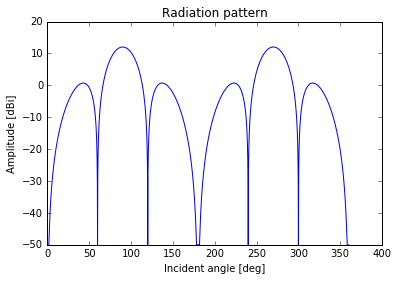

In [3]:
N = 4  # Number of antenna elements in the antenna system
d = 0.5  # Antenna element spacing

# Antenna element positions for ULA
x_coords = np.arange(N)*d - (N-1)*d/2
y_coords = np.zeros(N)
array_alignment = np.array((x_coords, y_coords))

rad_pattern = array_rad_pattern_plot(array_alignment = array_alignment)


Lets change the weight coefficients to $ \textbf{w} = \begin{bmatrix} 1 &-1 & 1 & -1 \end{bmatrix} $. With setting this coefficients we should see a null in the radiation pattern at $\theta = 90$

/opt/anaconda3/lib/python3.5/site-packages/pyargus/antennaArrayPattern.py:125: RuntimeWarning: divide by zero encountered in log10
  AF_log = 20*np.log10(abs(AF))


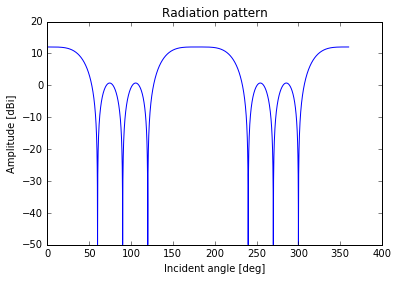

In [4]:
w     = np.array([1,-1,1,-1],dtype = complex)
rad_pattern = array_rad_pattern_plot(w=w, array_alignment = array_alignment)

One can calculate the weight coefficient vector to steer the main lobe direction to the desired position ($\theta$).

array([-0.22183091, -0.22187277, -0.22199837, ..., -0.22199837,
       -0.22187277, -0.22183091])

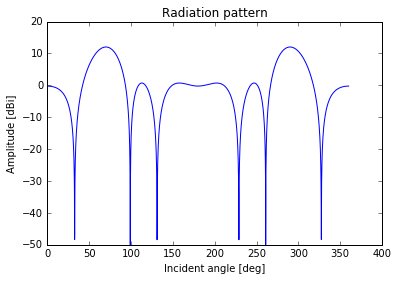

In [5]:
theta = 70  # Sets this value to steer the main beam position
for i in np.arange(0,N,1):
     w[i] = np.exp(i* 1j* 2*np.pi * d *np.cos(np.deg2rad(theta)))          
array_rad_pattern_plot(w=w, array_alignment = array_alignment)

We can also change the dynamic range of the radiation pattern plot by setting the "log_scale_min" paramter.

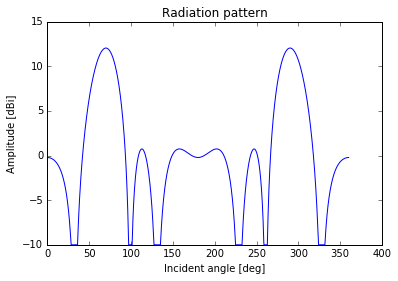

In [6]:
rad_pattern = array_rad_pattern_plot(w=w, array_alignment = array_alignment, log_scale_min=-10)

This demonstration code is wrapped by the "demo_ULA_plot" function in the "tests" directory. Let us call it with a different main beam position and antenna array size.

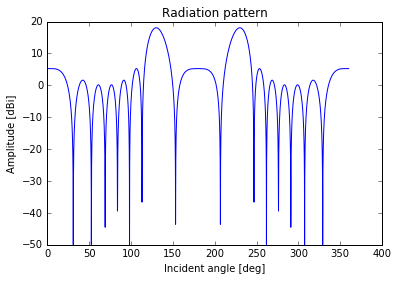

In [7]:
demo_ULA_plot(N=8, d=0.5, theta=130)